# Homework Assignment 4: Complex Numbers and the Mandelbrot Set

## Objected Oriented Programming

One of the main reasons why we code, or at least want to learn how to do so, is to automate routine tasks. Object-oriented programming is a method of structuring a program by bundling related properties and behaviors into individual **objects**. For example, an object could represent a person with **properties** like a name, age and address, and **behaviors** such as walking, talking, breathing, and running. Or in the example we will be considering later, an object could represent a complex number with properties like its real part, its imaginary part and behaviors like addition, multiplication, and conversion to polar coordinates. In this notebook we will introduce the basics of object-oriented programming in Python with the aim to implement the previously mentioned example of complex numbers. 


In [ ]:
# All Import Statements Defined Here
# Note: Do not add to this list anywhere.
# ----------------

import math
import numpy as np
import numpy.linalg as la

## Problem 1: Complex Numbers Class (6 points, 0.5 points per correct method)

Implement the class `Complex` representing complex numbers. It should satisfy the following specifications: 
* It should contain two instance attributes:
    * `real` for the real part of the complex number
    * `imag` for the imaginary part of the complex number. 
* It should contain the methods:
    * `__init__` for initializing a new instance of a complex number. See more specifications below. 
    * `__str__` for representing a complex number. See more specifications below.
    * `__add__` for adding two complex numbers.
    * `__sub__` for subtracting two complex numbers.
    * `__neg__` for negating a complex number.
    * `conjugate` for computing the conjugate of a complex number.
    * `__mul__` for multiplying two complex numbers.
    * `__truediv__` for dividing two complex numbers.
    * `__eq__` for checking if two complex numbers are equal.
    * `__ne__` for checking if two complex numbers are not equal.
    * `__abs__` for computing the absolute value of a complex number.
    * `phase` for computing the principal value of the argument of a complex number. (see math.atan2)
    * `polar` for computing the polar coordinates of a complex number. 
* If only a single parameter is provided to instantiate an object of the `Complex` class, we assume this number is used to represent a real number (i.e. Complex(5) should be the same as Complex(5, 0)). So by default the imaginary part should be zero. 
* The `__str__` method returns `a + bi` as a string (so not %f / %d %f) with the following conventions:
    * If b = 0, simply return a. (Instead of a + 0i)
    * If b = 1 or b = -1, simply return a + i or a - i. (Instead of a + 1i or a - 1i)
    * If b is negative, return a - bi such that b is positive. Example: it should return 2 - 3i instead of 2 + -3i. 
    * If a = 0, return bi. In case b is also negative, return -bi, where b is positive (no spaces). Example: it should return -3i instead of 0 - 3i. 
* `phase` should return a number between $-\pi$ and $\pi$, contrary to how we discussed the angle in the lecture which we defined to be between $-\pi/2$ and $3\pi/2$. Check using the testcases. If $z = 0$, the phase is undefined. You can safely ignore this special case.

In [402]:
import math

class Complex:
    """
    A class used to represent complex numbers.
        
    Attributes
    ----------
        real (float): the real part of the complex number
        imag (float): the imaginary part of the complex number (by default 0)
    
    
    Methods
    -------
        __init__(self, real, imag=0): Ininitialize a Complex number object, instantiating the
            attributes real and imag. 
        
        __str__(self): Returns a string that represent the complex number, see problem statement.
        
        __add__(self, other): Returns a Complex class object that is the sum of the complex
            numbers self and other.
            
        __sub__(self, other): Returns a Complex class object that is the difference of the complex
            numbers self and other.
            
        __neg__(self): Returns a Complex class object that is the negation of the complex number self.
        
        conjugate(self): Returns a Complex class object that is the complex conjugate of self.
        
        __mul__(self, other): Returns a Complex class object that is the product of self and other.
        
        __truediv__(self, other): Return a Complex class object that is the quotient of self and other.
        
        __eq__(self, other): Returns a boolean that is True if self and other are equal, i.e.
            have equal real and equal imaginary part.
            
        __ne__(self, other): Returns a boolean that is True if self and other are not equal.
        
        __abs__(self): Returns the length/norm/absolute value of the complex number self.
        
        phase(self): Returns the angle between -pi and pi of the complex number self.
        
        polar(self): Returns the tuple (r, theta), which are the absolute value and phase
            of the complex number self. 
    
    """
    
    # YOUR CODE HERE
    def __init__(self, real, imag=0):
        self.real: float  = real
        self.imag: float = imag

    def __str__(self):
        sign = "+"
        if self.imag <0:
            sign="-"
        base = str(self.real)+str(" "+sign+" ")+str(abs(self.imag))+str("i")

        if self.imag == 0:
            base=base.split(" ")[0]
        elif self.imag == -1 or self.imag == 1:
            base=base.split(sign)[0]+sign+" i"
        elif self.real == 0:
            base=str((self.imag))+str("i")
        return(base)
        
    def __add__(self, other):
        return(Complex(self.real+other.real, self.imag+other.imag))
    
    def __sub__(self, other):
        return(Complex(self.real-other.real, self.imag-other.imag))
    
    def __neg__(self):
        return(Complex(-self.real, -self.imag))
    
    def conjugate(self):
        return(Complex(self.real, -self.imag))
    
    def __mul__(self, other):
        a = self.real*other.real - self.imag*other.imag
        b = self.real*other.imag + self.imag*other.real
        return(Complex(a, b))
    
    def __truediv__(self, other):
        bot = other.real**2 + other.imag**2
        a = (self.real*other.real + self.imag*other.imag)/bot
        b = (self.imag*other.real - self.real*other.imag)/bot
        return(Complex(a, b))
    
    def __eg__(self, other):
        return(self.real == other.real and self.imag == other.imag)
    
    def __ne__(self, other):
        return(self.real != other.real and self.imag != other.imag)
    
    def __abs__(self):
        return(math.sqrt(self.real**2+self.imag**2))
    
    def phase(self):
        #tang =  abs(self.real/self.imag)
        return(math.atan2(self.imag, self.real))
    
    def polar(self):
        r = abs(Complex(self.real, self.imag))
        angle = Complex(self.real, self.imag).phase()
        return(r, angle)
    


In [403]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code. 
a=0
b=-5
sign = "+"
c=""
if b <0:
    sign="-"
base = str(a)+str(" "+sign+" ")+str(abs(b))+str("i")

if b == 0:
    base=base.split(" ")[0]
elif b == -1 or b == 1:
    base=base.split(sign)[0]+sign+" i"

if a == 0:
    base=sign+base.split(" ")[2]

print(base)

-5i


### Test cases

In [404]:
# Instantiate four complex numbers
z1 = Complex(1,2)
z2 = Complex(3, -1)
z3 = Complex(5)
z4 = Complex(0, -4)

# Correct attributes
print("Re(z1) =", z1.real, "  Im(z1) = ", z1.imag)
print("Re(z3) =", z3.real, "  Im(z3) = ", z3.imag, "\n")

# Printing complex numbers
print("z1 =", z1)
print("z2 =", z2)
print("z3 =", z3)
print("z4 =", z4, "\n")

# Adding two complex numbers
print("z1 + z2 =", z1 + z2)
print("z3 + z4 =", z3 + z4, "\n")

# Subtracting two complex numbers
print("z1 - z2 =", z1 - z2)
print("z3 - z4 =", z3 - z4, "\n")

# Negating a complex number
print("-z2 =", -z2)
print("-z4 =", -z4, "\n")

Re(z1) = 1   Im(z1) =  2
Re(z3) = 5   Im(z3) =  0 

z1 = 1 + 2i
z2 = 3 - i
z3 = 5
z4 = -4i 

z1 + z2 = 4 + i
z3 + z4 = 5 - 4i 

z1 - z2 = -2 + 3i
z3 - z4 = 5 + 4i 

-z2 = -3 + i
-z4 = 4i 



Expected output:

    Re(z1) = 1   Im(z1) =  2
    Re(z3) = 5   Im(z3) =  0 

    z1 = 1 + 2i
    z2 = 3 - i
    z3 = 5
    z4 = -4i 

    z1 + z2 = 4 + i
    z3 + z4 = 5 - 4i 

    z1 - z2 = -2 + 3i
    z3 - z4 = 5 + 4i 

    -z2 = -3 + i
    -z4 = 4i 

In [405]:
# Complex conjugate
print("conjugate(z1) =", z1.conjugate())
print("conjugate(z3) =", z3.conjugate())
print("conjugate(z4) =", z4.conjugate(), "\n")

# Multiplying two complex numbers
print("z1 * z2 =", z1 * z2)
print("z3 * z4 =", z3 * z4, "\n")

# Dividing two complex numbers
print("z1 / z2 =", z1 / z2)
print("z3 / z4 =", z3 / z4, "\n")

# Checking for equality
print(z1 == z1)
print(z1 == z2, "\n")

# Checking for inequality
print(z1 != z1)
print(z1 != z2, "\n")

conjugate(z1) = 1 - 2i
conjugate(z3) = 5
conjugate(z4) = 4i 

z1 * z2 = 5 + 5i
z3 * z4 = -20i 

z1 / z2 = 0.1 + 0.7i
z3 / z4 = 1.25i 

True
False 

False
True 



Expected output:

    conjugate(z1) = 1 - 2i
    conjugate(z3) = 5
    conjugate(z4) = 4i 

    z1 * z2 = 5 + 5i
    z3 * z4 = -20i 

    z1 / z2 = 0.1 + 0.7i
    z3 / z4 = 1.25i 

    True
    False 

    False
    True 

In [406]:
# Absolute value of a complex number
print("|z1| =", abs(z1))
print("|z2| =", abs(z2))
print("|z3| =", abs(z3), "\n")

# Phase / argument of a complex number
print("arg(z1) =", z1.phase())
print("arg(z2) =", z2.phase())
print("arg(z3) =", z3.phase())
print("arg(z4) =", z4.phase(), "\n")

# Polar coordinates
print("(r, theta) = ", z1.polar())
print("(r, theta) = ", z2.polar())

|z1| = 2.23606797749979
|z2| = 3.1622776601683795
|z3| = 5.0 

arg(z1) = 1.1071487177940904
arg(z2) = -0.3217505543966422
arg(z3) = 0.0
arg(z4) = -1.5707963267948966 

(r, theta) =  (2.23606797749979, 1.1071487177940904)
(r, theta) =  (3.1622776601683795, -0.3217505543966422)


Expected output:

    |z1| = 2.23606797749979
    |z2| = 3.1622776601683795
    |z3| = 5.0 

    arg(z1) = 1.1071487177940904
    arg(z2) = -0.3217505543966422
    arg(z3) = 0.0
    arg(z4) = -1.5707963267948966 

    (r, theta) =  (2.23606797749979, 1.1071487177940904)
    (r, theta) =  (3.1622776601683795, -0.3217505543966422)

In [407]:
# AUTOGRADING INSTANTIATING
z1 = Complex(1,2)
z2 = Complex(3, -1)
z3 = Complex(5)
z4 = Complex(0, -4)

assert z1.real == 1 and z1.imag == 2
assert z3.real == 5 and z3.imag == 0

In [408]:
# AUTOGRADING STRING PRINTING
assert str(z1) == "1 + 2i"
assert str(z2) == "3 - i"
assert str(z3) == "5"
assert str(z4) == "-4i"

In [409]:
# AUTOGRADING ADDITION
w = z1 + z2
v = z3 + z4
assert w.real == 4 and w.imag == 1
assert v.real == 5 and v.imag == -4

In [410]:
# AUTOGRADING SUBTRACTION
w = z1 - z2
v = z3 - z4
assert w.real == -2 and w.imag == 3
assert v.real == 5 and v.imag == 4

In [411]:
# AUTOGRADING NEGATION
w = -z2
v = -z4
assert w.real == -3 and w.imag == 1
assert v.real == 0 and v.imag == 4

In [412]:
# AUTOGRADING COMPLEX CONJUGATE
w = z1.conjugate()
v = z3.conjugate()
x = z4.conjugate()
assert w.real == 1 and w.imag == -2
assert v.real == 5 and v.imag == 0
assert x.real == 0 and x.imag == 4

In [413]:
# AUTOGRADING MULTIPLICATION
w = z1 * z2
v = z3 * z4
assert w.real == 5 and w.imag == 5
assert v.real == 0 and v.imag == -20

In [414]:
# AUTOGRADING DIVISION
w = z1 / z2
v = z3 / z4
assert w.real == 0.1 and w.imag == 0.7
assert v.real == 0 and v.imag == 1.25

In [415]:
# AUTOGRADING EQUALITY/INEQUALITY TESTING
assert (z1 == z1) == True
assert (z1 == z2) == False

assert (z1 != z1) == False
assert (z1 != z2) == True

In [416]:
# AUTOGRADING ABSOLUTE VALUE
import numpy as np
np.testing.assert_almost_equal(abs(z1), 2.23606797749979)
np.testing.assert_almost_equal(abs(z2), 3.1622776601683795)
np.testing.assert_almost_equal(abs(z3), 5.0)

In [417]:
# AUTOGRADING PHASE
np.testing.assert_almost_equal(z1.phase(), 1.1071487177940904)
np.testing.assert_almost_equal(z2.phase(), -0.3217505543966422)
np.testing.assert_almost_equal(z3.phase(), 0.0)
np.testing.assert_almost_equal(z4.phase(), -1.5707963267948966)

In [418]:
# AUTOGRADING POLAR COORDINATES
np.testing.assert_almost_equal(z1.polar(), (2.23606797749979, 1.1071487177940904))
np.testing.assert_almost_equal(z2.polar(), (3.1622776601683795, -0.3217505543966422))

## Problem 2: Determinant of complex-valued matrix (1 point)

Python already contains some built-in functionality to define complex numbers by adding the letter 'j'. The letter 'j' is used to denote the imaginary unit, instead of 'i', because Python follows engineering, where 'i' denotes the electric current. So one could define $2 + 3i$ in Python as `2 + 3j`. You can also use `complex(2,3)`, note the lowercase though!

Problem: Compute the determinant of the following matrix:
$$\begin{bmatrix} 3 & 1-i & i & 4 \\
3 & 1 & 1 - 2i & 4 + 7i \\
6i & 2 + 2i & -2 & 3i \\
-3 & -1 + i & 1 & 3 - 4i\end{bmatrix},$$
and assign it to the variable `D`. 

In [419]:
import numpy as np
import numpy.linalg as la

# YOUR CODE HERE
A = np.array([[3, complex(1, -1), complex(0, 1), 4],
              [3, 1, complex(1, -2), complex(4, 7)], 
              [complex(0, 6), complex(2, 2), -2, complex(0, 3)],
              [-3, complex(-1, 1), 1, complex(3, -4)]])
# A = A.astype(int)
n = int(A.size**0.5)
D = 0
# print(A)
for i in range(1):
    for j in range(n):
        M = np.delete(A, i, 0)
        M = np.delete(M, j, 1)
        # mij = int(np.linalg.det(M))
        mij = np.linalg.det(M)
        # print("\n", M, mij)
        D += A[i,j]*mij*(-1)**(i+j)
D = np.round(D, 10)
# print(D)

In [420]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code. 
a=complex(1,2)
b=complex(2,3)
c=complex(3, 0)
a*c

(3+6j)

In [421]:
assert D == -15 - 15j

## Mandelbrot Set

The [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set) is a well known and beautiful fractal. The Mandelbrot set broods in silent complexity at the center of the complex plane. When a certain operation is applied repeatedly to the numbers (see this operation below), the ones outside the set flee to infinity, whereas the numbers inside remain to drift or dance about. Close to the boundary minutely choreographed wanderings mark the onset of the instability. You should be astonished by its variety, complexity and strange beauty arising from the application of one simple rule.

The basic idea behind the Mandelbrot set is that we represent each pixel in an image by a complex number $c = x + yi$. Now we will check for each point $c$ in the plane what happens if we keep iterating the computation

$$z_{n+1} = z_n^2 + c,$$
with $z_0 = 0$ and $c$ the points in the plane we are looking at.

Two different things can happen. As the number of iterations advances, either $|z|$ diverges and tends to infinity, or it remains bounded. The Mandelbrot set is the collection of those points $c$ such that the orbit of $z = 0$ remains bounded under iteration of our quadratic map $z \mapsto z^2 + c$. Since we cannot let our computer iterate an infinite number of times, typically you put a bound on how many times you do this calculation. Moreover, we will keep track of how fast $|z|$ goes to infinity, by checking how many steps it takes until $|z| > 2$. If $|z| > 2$, it so happens that $c$ is certainly not part of the Mandelbrot set. 

## Problem 3: Mandelbrot iterations (2 points)

Implement the function `mandelbrot_iterations` below which computes the number of iterations needed for the recurrence $z_{n+1} = z_n^2 + c$ with $z_0 = 0$ to reach a value $z$ such that $|z| > 2$, or until the maximum number of iterations is reached. Use the built-in `complex` numbers, instead of our own class `Complex`. 
*Hint: to speed up your computations, instead of checking if $|z| > 2$, it's computationally easier to check $|z|^2 = Re(z)^2 + Im(z)^2 > 4$, because calculating a square root is computationally complex.*

In [422]:
def mandelbrot_iterations(c, max_iterations):
    """
    Return the number of iterations needed to reach a modulus strictly greater than 2. 
    If the number of iterations is greater than max_iterations, return max_iterations.
    
    Parameters
    ----------
        c (complex): Parameter of the formula z_{n+1} = z_n^2 + c
        max_iterations (int): Upper bound for the number of iterations performed.
            
    Returns
    -------
        iteration (int): The number of iterations required to determine if the corresponding
            point is not the Mandelbrot set. 
    
    """
    
    z = complex(0,0)
    iteration = 0
    
    # YOUR CODE HERE
    while z.real**2+z.imag**2 < 4 and iteration < max_iterations:
        z = z**2 + c
        iteration += 1
     
    return(iteration)

In [423]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code. 
z = complex(0,0)
iteration = 0

c = 0 + 0j
max_iterations = 10
a=0
    
    # YOUR CODE HERE
#while  (iteration <= max_iterations) or (z.real**2+z.imag**2 < 2):
while  (iteration < max_iterations) and (a < 11):
    z = z**2 + c
    iteration += 1
    a += 1
    print(z, iteration, max_iterations, a)



0j 1 10 1
0j 2 10 2
0j 3 10 3
0j 4 10 4
0j 5 10 5
0j 6 10 6
0j 7 10 7
0j 8 10 8
0j 9 10 9
0j 10 10 10


In [424]:
# Test cases
c1 = 0 + 0j
c2 = 0.5 - 0.5j
c3 = 3

n1 = mandelbrot_iterations(c1, 100)
n2 = mandelbrot_iterations(c2, 100)
n3 = mandelbrot_iterations(c3, 100)

print("For c1 = 0 it took", n1, "iterations")
print("For c2 = 0.5 - 0.5i it took", n2, "iterations")
print("For c2 = 3 it took", n3, "iterations")

For c1 = 0 it took 100 iterations
For c2 = 0.5 - 0.5i it took 5 iterations
For c2 = 3 it took 1 iterations


Expected output:

    For c1 = 0 it took 100 iterations
    For c2 = 0.5 - 0.5i it took 5 iterations
    For c2 = 3 it took 1 iterations

In [425]:
# AUTOGRADING
c1 = 0 + 0j
c2 = 0.5 - 0.5j
c3 = 3

n1 = mandelbrot_iterations(c1, 100)
n2 = mandelbrot_iterations(c2, 100)
n3 = mandelbrot_iterations(c3, 100)

assert n1 == 100
assert n2 == 5
assert n3 == 1

## Problem 4: Mandelbrot image (1 point)

Implement the function `mandelbrot_image`. 

In [426]:
import numpy as np

def mandelbrot_image(height, width, c1, c2, max_iterations):
    """
    Computea an array of shape (height, width) containing the 
    number of mandelbrot iterations for equally spaced complex number in a 
    rectangle whose top left corner is represented by the complex number c1
    and whose bottom right corner is represeneted by the complex number c2.
    
    Parameters
    ----------
        height (int): the vertical number of pixels
        width (int): the horizontal number of pixels 
        c1 (complex): complex number representing top left corner
        c2 (complex): complex number representing bottom right corner
        max_iterations (int): upper bound for the number of iterations performed.
    
    
    Returns
    -------
        mandelbrot_array (ndarray): array of shape (height, width) containing at 
            entry [i,j] the number of mandelbrot iterations for the complex number
            c with c.real = c1.real - j * (c1.real - c2.real) / (width - 1)
            and c.imag = c1.imag - i * (c1.imag - c2.imag) / (height - 1). 
            So the entry at [0,0] corresponds to mandelbrot_iterations(c1, max_iterations)
            and at [height-1, width-1] is mandelbrot_iterations(c2, max_iterations).
        
    """
    
    mandelbrot_array = np.zeros((height, width))
    
    # YOUR CODE HERE
    for i in range(height):
        for j in range(width):
            c = complex(c1.real - j * (c1.real - c2.real) / (width - 1), c1.imag - i * (c1.imag - c2.imag) / (height - 1))
            mandelbrot_array[i, j] = mandelbrot_iterations(c, max_iterations)
            

    
    return(mandelbrot_array)

In [427]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code. 
height = 200
width = 300
max_iterations = 100
c1 = complex(-2, 1)
c2 = complex(1, -1)
mandelbrot_array = np.zeros((height, width))

# for i in range(height):
#     for j in range(width):
#         c = complex(0,0)
#         c.real = c1.real - j * (c1.real - c2.real) / (width - 1)
#         c.imag = c1.imag - i * (c1.imag - c2.imag) / (height - 1)
#         mandelbrot_array[i, j] = mandelbrot_iterations(c, max_iterations)
c= complex(c1.real - 1 * (c1.real - c2.real) / (width - 1), c1.imag - 1 * (c1.imag - c2.imag) / (height - 1))
print(c)

(-1.9899665551839465+0.9899497487437185j)


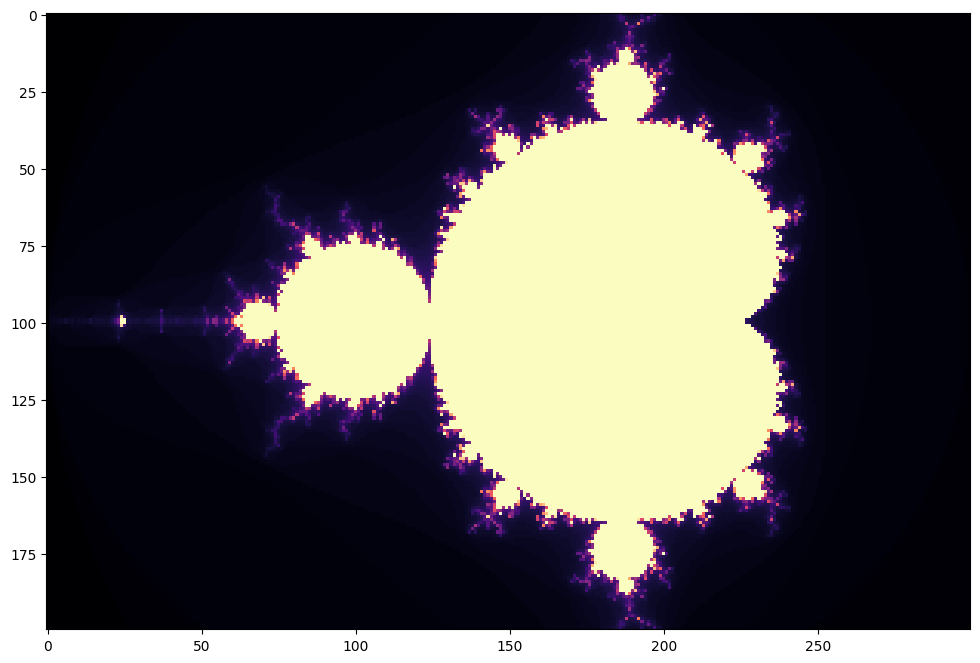

In [428]:
# Quick rendering to check your code.
import matplotlib.pyplot as plt
x = mandelbrot_image(200, 300, complex(-2, 1), complex(1, -1), 100)
plt.rcParams["figure.figsize"]=12,8
plt.imshow(x, cmap="magma")

In [429]:
# AUTOGRADING
x = mandelbrot_image(200, 300, complex(-2, 1), complex(1, -1), 50)
assert np.allclose(x[35:40, 140:145], np.array([[13, 17, 28, 26, 40],
                                                [13, 17, 24, 50, 31],
                                                [19, 37, 36, 22, 34],
                                                [27, 21, 17, 19, 30],
                                                [15, 15, 15, 26, 28]]))

## Extra: Zooming in on the Mandelbrot set

In the cells below, we create a couple of renderings of the Mandelbrot set, where we have zoomed in on specific regions. You can play around with it as you like (some images might take a while to render, especially if you'd like them at a higher resolution and using a higher max_iterations). 

In [430]:
# import matplotlib.pyplot as plt
# x = mandelbrot_image(400, 600, complex(-2, 1), complex(1,-1), 100)

# plt.rcParams["figure.figsize"]=12,8
# plt.imshow(x, cmap="magma")

In [431]:
# y = mandelbrot_image(400, 600, complex(-1.2, 0.4), complex(-0.6,0), 100)

# plt.rcParams["figure.figsize"]=12,8
# plt.imshow(y, cmap="magma")

In [432]:
# z = mandelbrot_image(400, 600, complex(-0.77, 0.1), complex(-0.74,0.08), 200)

# plt.rcParams["figure.figsize"]=12,8
# plt.imshow(z, cmap="magma")

In [433]:
# you can change the size of the image and the max_iterations
# to make it look nicer

# z2 = mandelbrot_image(400, 600, complex(-0.75, 0.097), complex(-0.744,0.093), 200)

# plt.rcParams["figure.figsize"]=12,8
# plt.imshow(z2, cmap="magma")